In [1]:
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import glob
import math
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [2]:
basedir = os.getcwd()
datadir = basedir + '/data'

# reading the csv file with annotated image file names
train_cultivar= pd.read_csv(datadir + '/train_cultivar_mapping.csv')
train_cultivar.dropna(inplace=True)

# turning cultivar labels into strings
train_cultivar['cultivar']=train_cultivar['cultivar'].astype(str)
train_cultivar.head()

,image,cultivar
0,2017-06-16__12-24-20-930.png,PI_257599
1,2017-06-02__16-48-57-866.png,PI_154987
2,2017-06-12__13-18-07-707.png,PI_92270
3,2017-06-22__13-18-06-841.png,PI_152651
4,2017-06-26__12-56-48-642.png,PI_176766


In [3]:
# creating list of unique cultivars
labels=list(np.unique(train_cultivar['cultivar']))

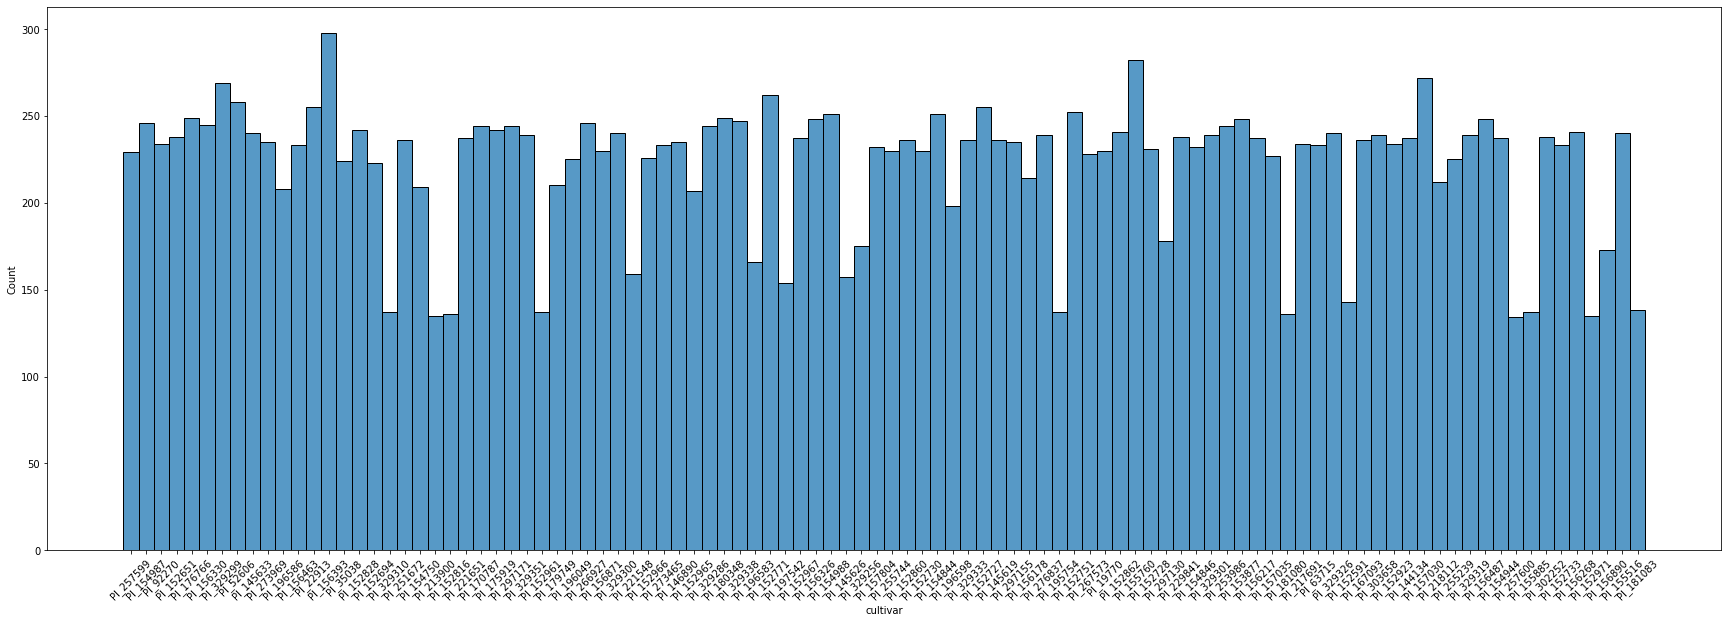

In [4]:
# visualizing frequency of cultivars 

import seaborn as sns
a=pd.DataFrame({'cultivar':train_cultivar['cultivar']})
plt.figure(figsize=(30,10))
sns.histplot(a,x='cultivar')
plt.xticks(rotation=45)
plt.show()

In [21]:
# using pandas dataframe to load images and split training/validation

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.9, horizontal_flip=True, shear_range=0.2, validation_split = 0.2)

# loading training images
train_data = train_datagen.flow_from_dataframe(train_cultivar, datadir + "/train_images/",
        color_mode='rgb', batch_size = 1, x_col='image', y_col='cultivar' , classes=labels , 
        class_mode='categorical', target_size=(300, 300), subset = 'training')

# loading validation images
val_data = train_datagen.flow_from_dataframe(train_cultivar, datadir + "/train_images/",
        color_mode='rgb', x_col='image', y_col='cultivar' , classes=labels , 
        class_mode='categorical', batch_size = 1, target_size=(300, 300), subset = 'validation')

Found 17755 validated image filenames belonging to 100 classes.
Found 4438 validated image filenames belonging to 100 classes.


In [10]:
train_data

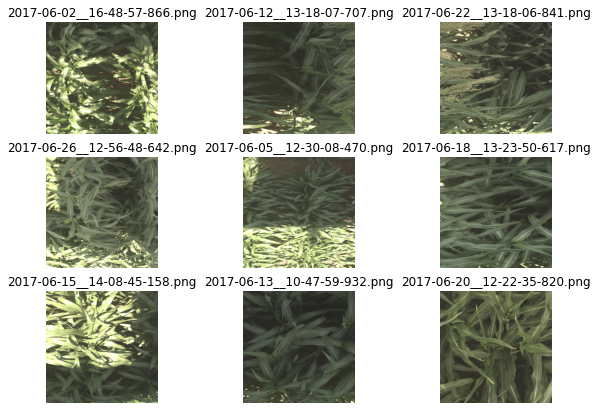

In [41]:
img_path= datadir + "/train_images"
fig = plt.figure(figsize=(10,7))
rows = 3
columns =3
for i in range(1,10):
    image=plt.imread(img_path+f"/{train_cultivar.image.values[i]}")
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
    plt.axis('off')
    plt.title(train_cultivar.image.values[i])

Resolving data files:   0%|          | 0/22193 [00:00<?, ?it/s]

Using custom data configuration default-39d78e3f52a66659


Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset image_folder downloaded and prepared to /home/.cache/huggingface/datasets/image_folder/default-39d78e3f52a66659/0.0.0/48efdc62d40223daee675ca093d163bcb6cb0b7d7f93eb25aebf5edca72dc597. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

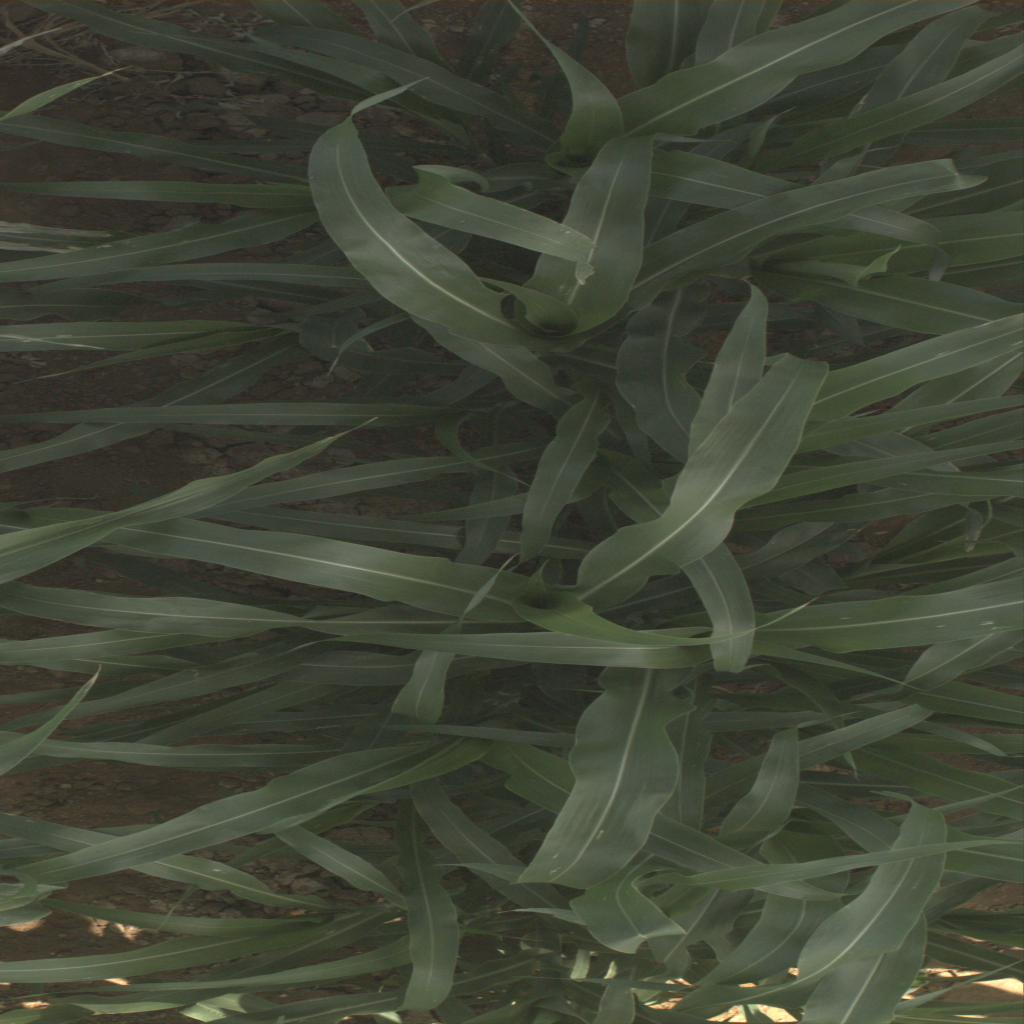

In [42]:
# loading image dataset
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir= datadir + "/train_images")
dataset["train"][0]["image"]

In [48]:
dataset['train'][2]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 'label': 0}

In [43]:
# transforming dataset
def transforms(examples):
    examples["pixel_values"] = [image.convert("RGB").resize((100,100)) for image in examples["image"]]
    return examples

In [53]:
from torch.utils.data import Dataset
train_dataset = Dataset.from_dict(train_cultivar)

ModuleNotFoundError: No module named 'Dataset'